<a href="https://colab.research.google.com/github/FrankStein31/Prediksi-Tren-Pengiriman-Paket-Kota-Malang/blob/main/Skripsi_Pengiriman_Paket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install prophet

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet

from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Skripsi Frankie Steinlie/Implementasi Kode/DATA_ASLI_4 TAHUN_ORI.xlsx")
df.describe()

,SLA,Kantor_Kirim,Tgl_Kirim,Tgl_Antaran_Pertama,Tgl_Update,Berat,Cek
count,965003.000000,965003.000000,965003,965003,965003,965003.000000,965003.0
mean,2.281931,50826.053391,2023-02-25 02:27:21.960491520,2023-02-27 02:38:10.271842304,2023-02-27 03:56:00.154942208,0.569269,1.0
min,2.000000,10000.000000,2020-12-26 00:00:00,2021-01-01 00:00:00,2021-01-01 00:00:00,0.010000,1.0
25%,2.000000,40000.000000,2022-04-03 00:00:00,2022-04-05 00:00:00,2022-04-05 00:00:00,0.020000,1.0
50%,2.000000,61300.000000,2023-02-27 00:00:00,2023-02-28 00:00:00,2023-02-28 00:00:00,0.100000,1.0
75%,2.000000,65100.000000,2024-03-01 00:00:00,2024-03-03 00:00:00,2024-03-03 00:00:00,0.980000,1.0
max,6.000000,99900.000000,2024-12-29 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,10.000000,1.0
std,0.651119,22275.113908,NaN,NaN,NaN,1.061399,0.0


In [ ]:
# display(df)
df.head(10)
# df.tail()

,Nosi,Posisi_Saat_Ini,Status Kiriman,Produk,SLA,Kantor_Kirim,Tgl_Kirim,Tgl_Antaran_Pertama,Tgl_Update,Petugas,Nama_Penerima,Alamat,Kota,Alasan_Gagal,Alasan_Irregulitas,Status_SWP,Berat,Cek
0,P2411210183594,KCU MALANG 65100,DELIVERED,PKH,2,65100,2021-11-20,2021-11-22,2021-11-22,A Luthfi Pratama,YUSNITA WIDIASTUTIK,PLAOSAN PERMAI C24 6.14,"KOTA MALANG, KLOJEN",-,-,ontime,0.02,1
1,P2404080039631,KCU MALANG 65100,DELIVERED,PKH,2,12000,2021-04-08,2021-04-10,2021-04-10,Chamdan Nurhaqiqi,P3M POLTEK NEGERI MALANG,HKI.3-HI.05.01.02.S00202311152 JL.SOEKARNO HAT...,"KOTA MALANG, LOWOKWARU",-,-,ontime,0.02,1
2,P2406220115718,KCU MALANG 65100,DELIVERED,PKH,2,57100,2021-06-21,2021-06-23,2021-06-23,A Luthfi Pratama,LOGISTIK HEAD,"PT PARIT PADANG GLOBAL CAB,MALANG JL TENAGA BA...","KOTA MALANG, BLIMBING",-,-,ontime,1.00,1
3,P2406280008741,KCU MALANG 65100,DELIVERED,PKH,2,65100,2021-06-27,2021-06-29,2021-06-29,Rey Septianto Arif,USWATUN CHASANAH,KEPUH GG IX/7 B,"KOTA MALANG, SUKUN",-,-,ontime,0.10,1
4,P2409140003318,KCU MALANG 65100,DELIVERED,PKH,2,15400,2021-09-14,2021-09-16,2021-09-16,Perdata Purba Dermawan,HAIDAR MUHAMMAD ILHAM,Jl Danau Jonge H731C Sebelah Ayam Bebek Tunjun...,"KOTA MALANG, KEDUNGKANDANG",-,-,ontime,4.08,1
5,P2408310133700,KCU MALANG 65100,DELIVERED,PKH,2,43200,2021-08-31,2021-09-02,2021-09-02,Mochamad Yusuf,MUHAMMAD YUSUF,JLN PERMADI NO 28 RT 9 RW 4 POLEHAN BLIMBING M...,"KOTA MALANG, BLIMBING",-,-,ontime,0.60,1
6,P2409250219871,KCU MALANG 65100,DELIVERED,PKH,3,53300,2021-09-25,2021-09-28,2021-09-28,A Luthfi Pratama,FIKO AAN,JL LA SUCIPTO GG TARUNA 3 RT05 RW03 KEL PANDAN...,"KOTA MALANG, BLIMBING",-,-,ontime,0.25,1
7,P2411290105952,KCU MALANG 65100,DELIVERED,PKH,2,65100,2021-11-29,2021-11-30,2021-11-30,Mochamad Yusuf,BP SALMAN FARIS FMLL,JL KUNTABHASWARA VI 7 RT RW KEL POLEHAN KEC ...,"KOTA MALANG, BLIMBING",-,-,ontime,1.00,1
8,P2403160153182,KCU MALANG 65100,DELIVERED,PKH,4,25000,2021-03-16,2021-03-19,2021-03-19,Muhammad Febri Andri Putra,ustadz h ahmad rivani,perum jaya grand blok x no 134 rt 2 rw 8 kel m...,"KOTA MALANG, LOWOKWARU",-,-,ontime,0.30,1
9,P2411090014831,KCU MALANG 65100,DELIVERED,PKH,2,65100,2021-11-07,2021-11-09,2021-11-09,Septiandy Catur Praseptyo,DHEA DITAYANA PUTRI,JL MT HARYONO II 373 RT 1 RW 3,"KOTA MALANG, LOWOKWARU",-,-,ontime,0.10,1


In [ ]:
df = df[['Kota', 'Cek', 'Tgl_Kirim']]
# display(df)
df.head(10)

,Kota,Cek,Tgl_Kirim
0,"KOTA MALANG, KLOJEN",1,2021-11-20
1,"KOTA MALANG, LOWOKWARU",1,2021-04-08
2,"KOTA MALANG, BLIMBING",1,2021-06-21
3,"KOTA MALANG, SUKUN",1,2021-06-27
4,"KOTA MALANG, KEDUNGKANDANG",1,2021-09-14
5,"KOTA MALANG, BLIMBING",1,2021-08-31
6,"KOTA MALANG, BLIMBING",1,2021-09-25
7,"KOTA MALANG, BLIMBING",1,2021-11-29
8,"KOTA MALANG, LOWOKWARU",1,2021-03-16
9,"KOTA MALANG, LOWOKWARU",1,2021-11-07


In [ ]:
df['Kecamatan'] = df['Kota'].apply(lambda x: x.split(',')[1].strip() if len(x.split(',')) > 1 else '')
display(df)

,Kota,Cek,Tgl_Kirim,Kecamatan
0,"KOTA MALANG, KLOJEN",1,2021-11-20,KLOJEN
1,"KOTA MALANG, LOWOKWARU",1,2021-04-08,LOWOKWARU
2,"KOTA MALANG, BLIMBING",1,2021-06-21,BLIMBING
3,"KOTA MALANG, SUKUN",1,2021-06-27,SUKUN
4,"KOTA MALANG, KEDUNGKANDANG",1,2021-09-14,KEDUNGKANDANG
...,...,...,...,...
964998,"KOTA MALANG, LOWOKWARU",1,2024-12-01,LOWOKWARU
964999,"KOTA MALANG, BLIMBING",1,2024-12-01,BLIMBING
965000,"KOTA MALANG, KEDUNGKANDANG",1,2024-12-01,KEDUNGKANDANG
965001,"KOTA MALANG, KLOJEN",1,2024-12-01,KLOJEN


In [ ]:
df = df[['Kecamatan', 'Cek', 'Tgl_Kirim']]
display(df)

,Kecamatan,Cek,Tgl_Kirim
0,KLOJEN,1,2021-11-20
1,LOWOKWARU,1,2021-04-08
2,BLIMBING,1,2021-06-21
3,SUKUN,1,2021-06-27
4,KEDUNGKANDANG,1,2021-09-14
...,...,...,...
964998,LOWOKWARU,1,2024-12-01
964999,BLIMBING,1,2024-12-01
965000,KEDUNGKANDANG,1,2024-12-01
965001,KLOJEN,1,2024-12-01


In [ ]:
df_kecamatan_weekly = df.groupby('Kecamatan').resample('W', on='Tgl_Kirim')['Cek'].count().reset_index()
df_kecamatan_weekly.rename(columns={'Cek': 'total paket'}, inplace=True)
display(df_kecamatan_weekly)

,Kecamatan,Tgl_Kirim,total paket
0,BLIMBING,2020-12-27,7
1,BLIMBING,2021-01-03,217
2,BLIMBING,2021-01-10,518
3,BLIMBING,2021-01-17,432
4,BLIMBING,2021-01-24,446
...,...,...,...
1045,SUKUN,2024-12-01,584
1046,SUKUN,2024-12-08,764
1047,SUKUN,2024-12-15,798
1048,SUKUN,2024-12-22,804


In [ ]:
df_kecamatan_weekly['minggu_ke'] = df_kecamatan_weekly['Tgl_Kirim'].dt.isocalendar().week.astype(int)
display(df_kecamatan_weekly)

,Kecamatan,Tgl_Kirim,total paket,minggu_ke
0,BLIMBING,2020-12-27,7,52
1,BLIMBING,2021-01-03,217,53
2,BLIMBING,2021-01-10,518,1
3,BLIMBING,2021-01-17,432,2
4,BLIMBING,2021-01-24,446,3
...,...,...,...,...
1045,SUKUN,2024-12-01,584,48
1046,SUKUN,2024-12-08,764,49
1047,SUKUN,2024-12-15,798,50
1048,SUKUN,2024-12-22,804,51


In [ ]:
output_path = '/content/drive/MyDrive/Skripsi Frankie Steinlie/Implementasi Kode/df_kecamatan_weekly.xlsx'
df_kecamatan_weekly.to_excel(output_path, index=False)
print(f"DataFrame 'df_kecamatan_weekly' berhasil di simpan di {output_path}")

DataFrame 'df_kecamatan_weekly' berhasil di simpan di /content/drive/MyDrive/Skripsi Frankie Steinlie/Implementasi Kode/df_kecamatan_weekly.xlsx


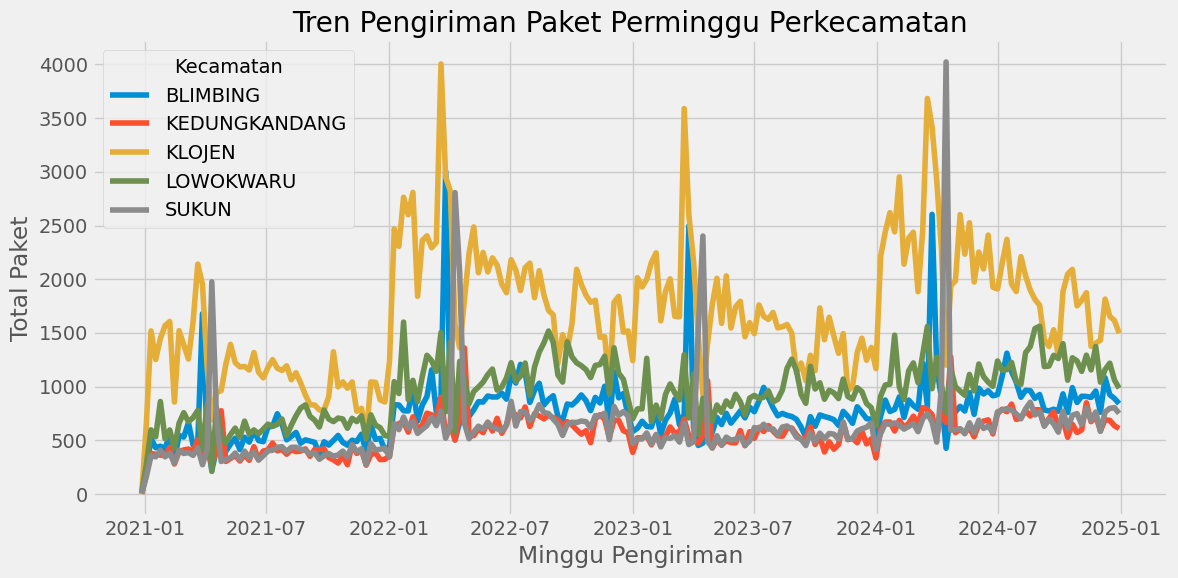

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_kecamatan_weekly, x='Tgl_Kirim', y='total paket', hue='Kecamatan')
plt.title('Tren Pengiriman Paket Perminggu Perkecamatan')
plt.xlabel('Minggu Pengiriman')
plt.ylabel('Total Paket')
plt.legend(title='Kecamatan')
plt.grid(True)
plt.tight_layout()
plt.show()

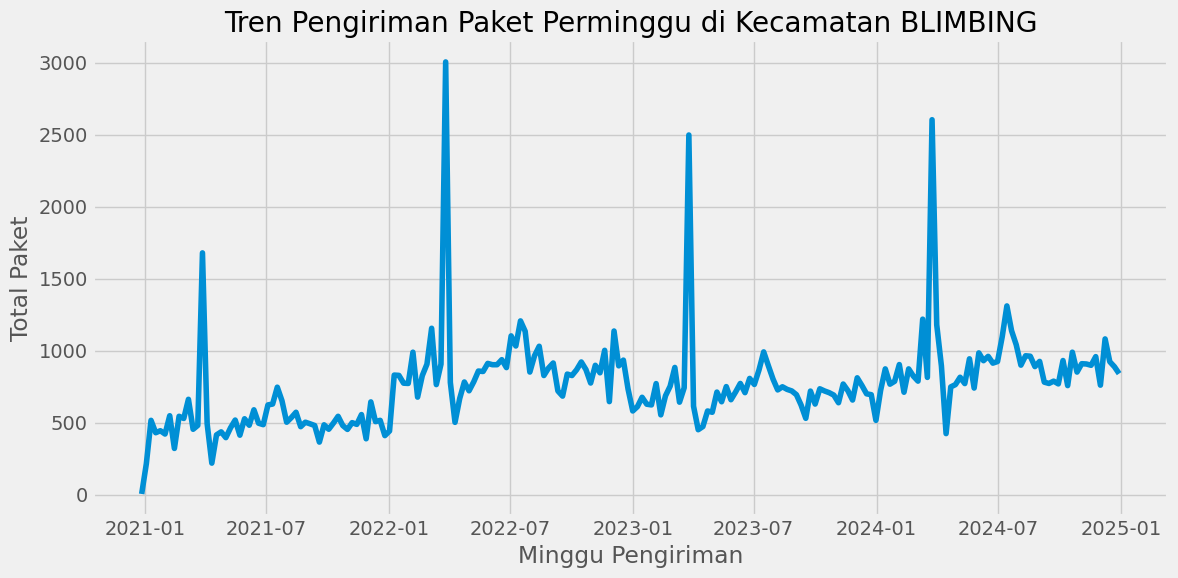

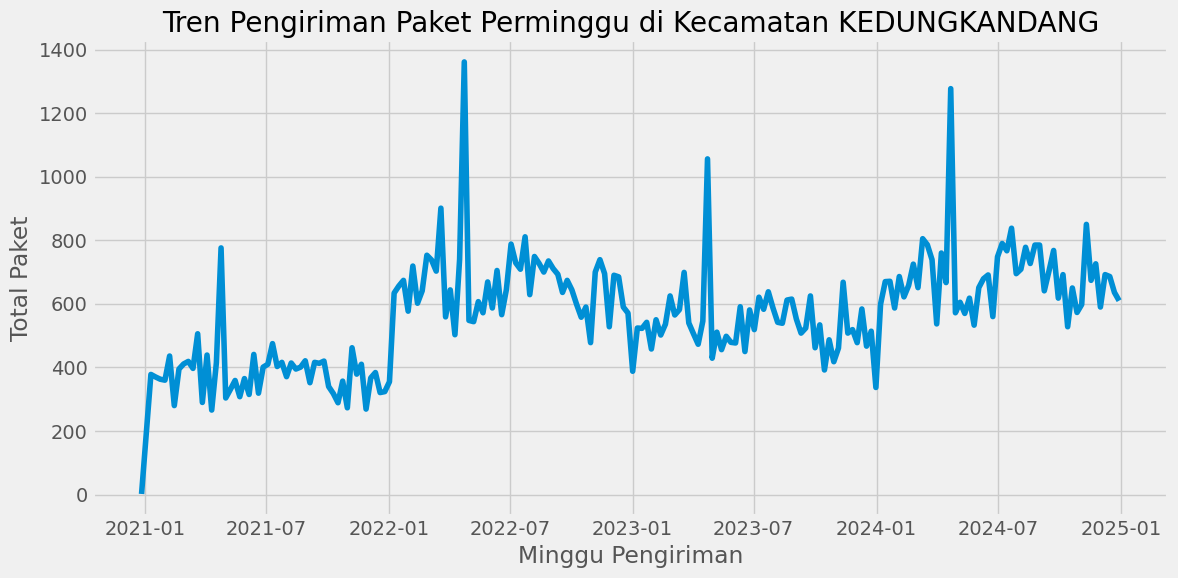

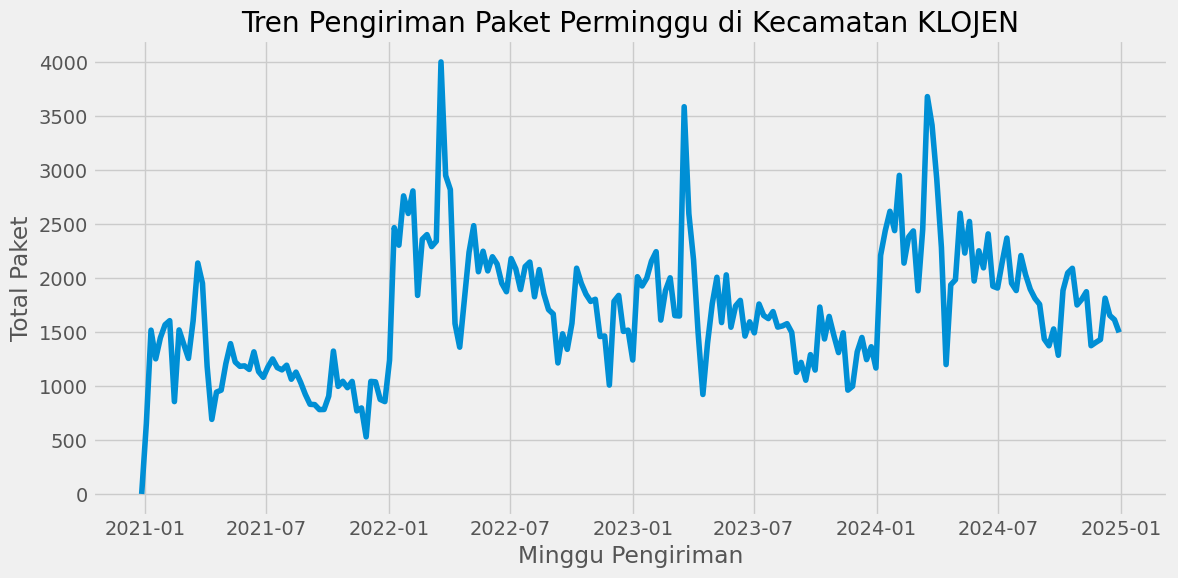

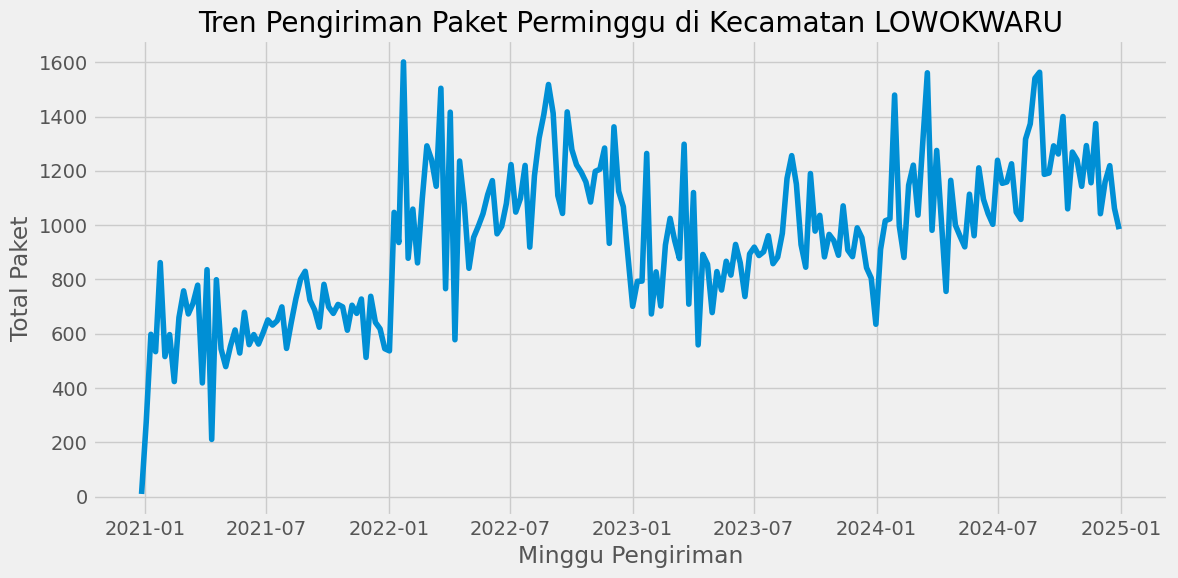

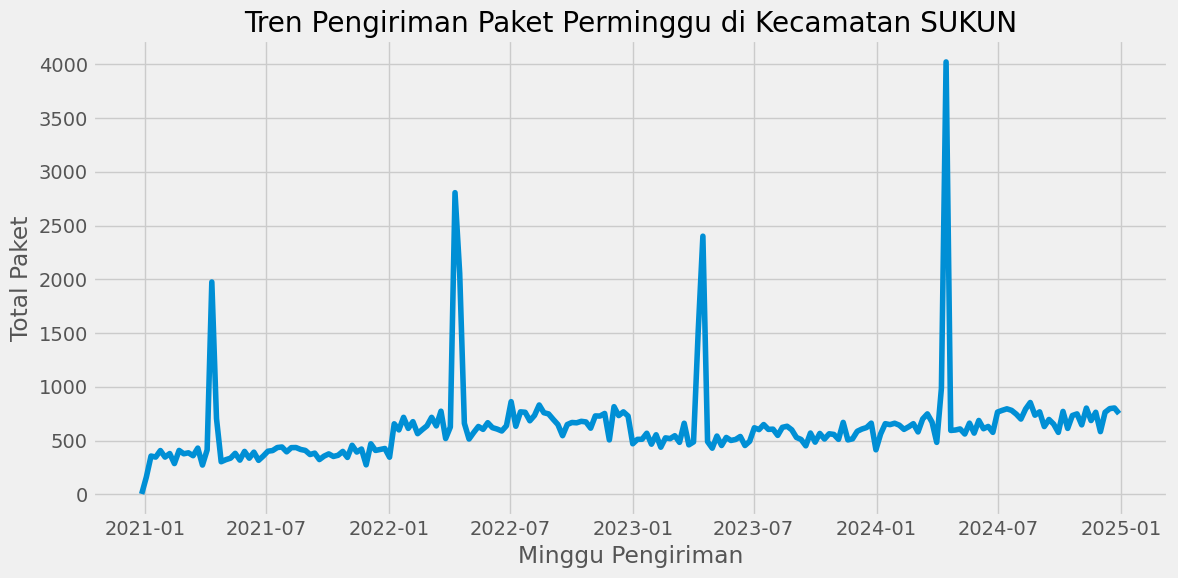

In [ ]:
unique_kecamatan = df_kecamatan_weekly['Kecamatan'].unique()

for kecamatan in unique_kecamatan:
    df_filtered = df_kecamatan_weekly[df_kecamatan_weekly['Kecamatan'] == kecamatan]

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_filtered, x='Tgl_Kirim', y='total paket')
    plt.title(f'Tren Pengiriman Paket Perminggu di Kecamatan {kecamatan}')
    plt.xlabel('Minggu Pengiriman')
    plt.ylabel('Total Paket')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

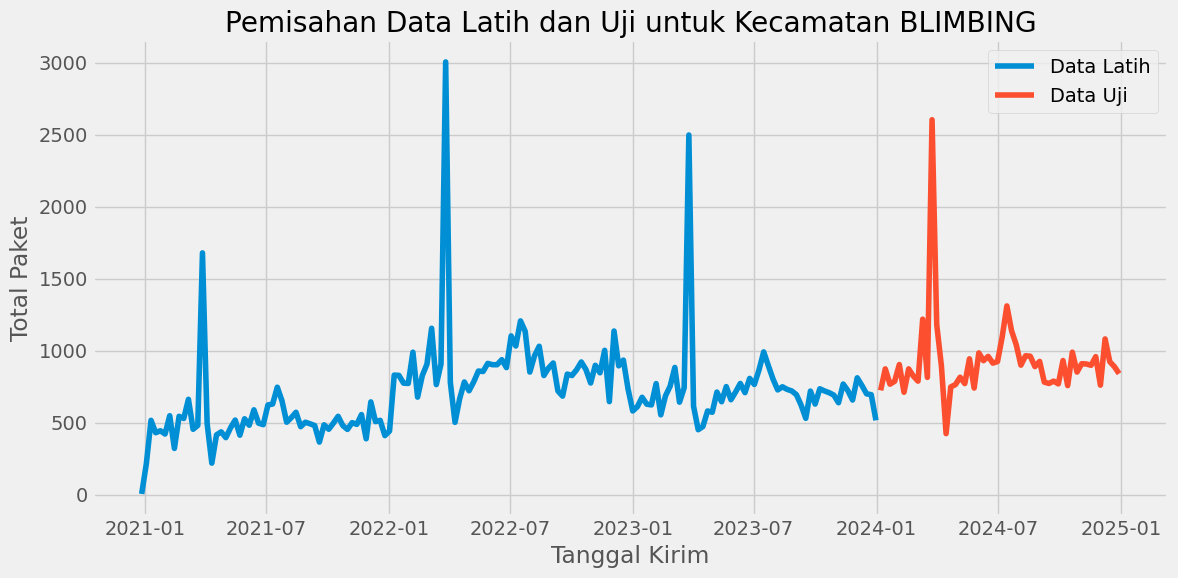

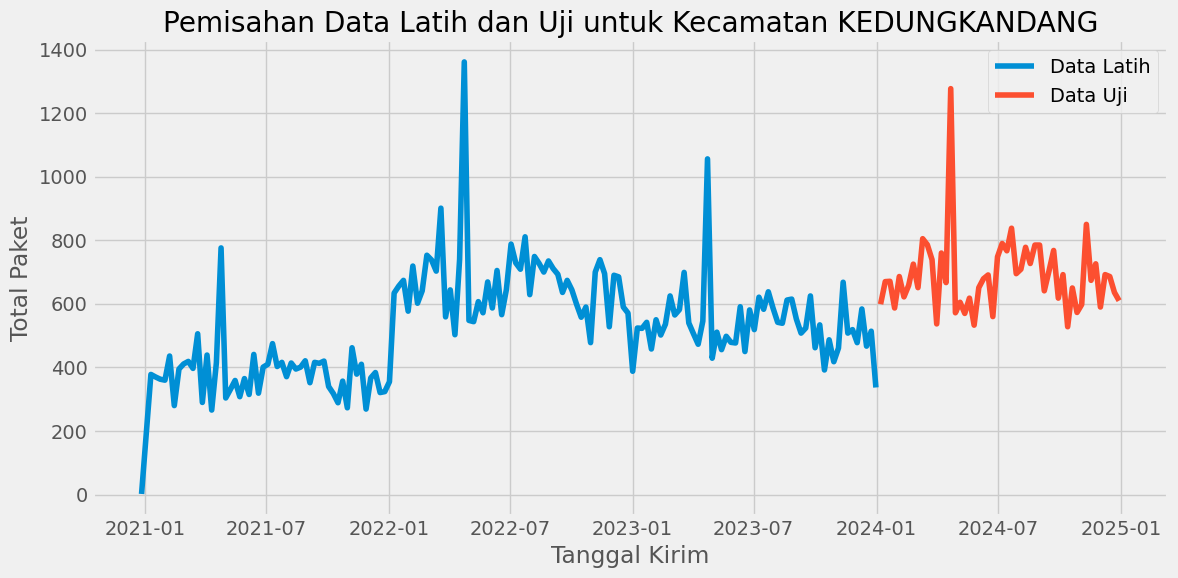

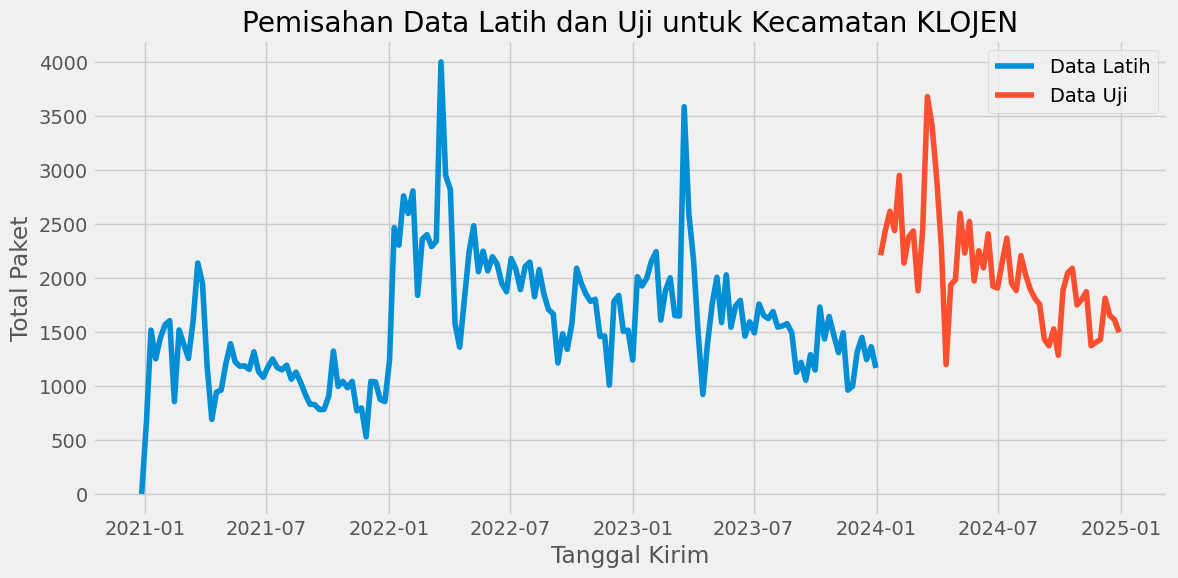

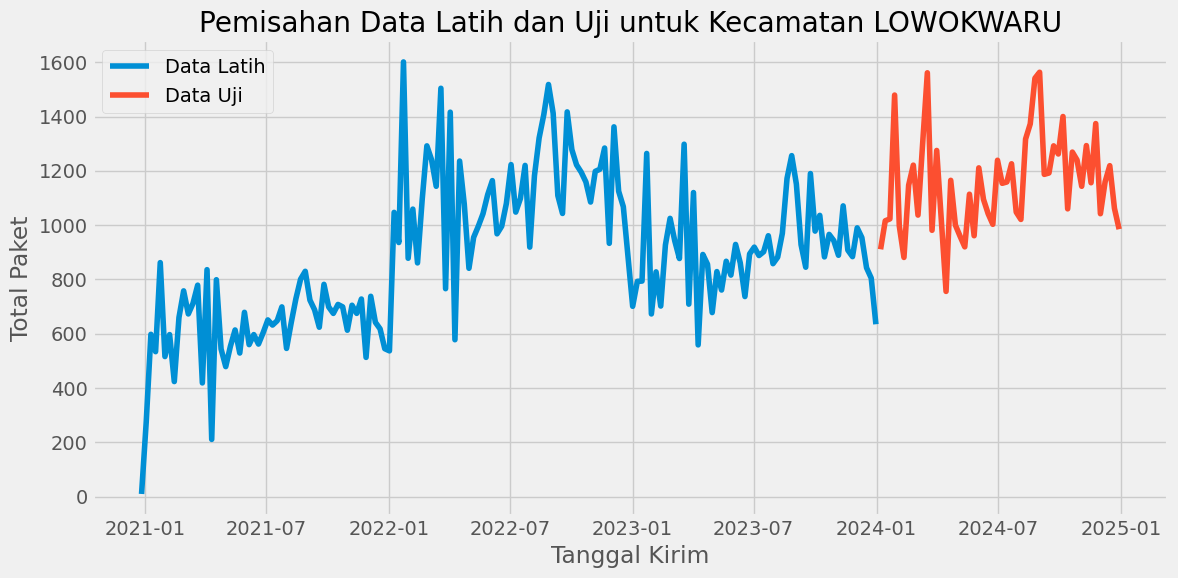

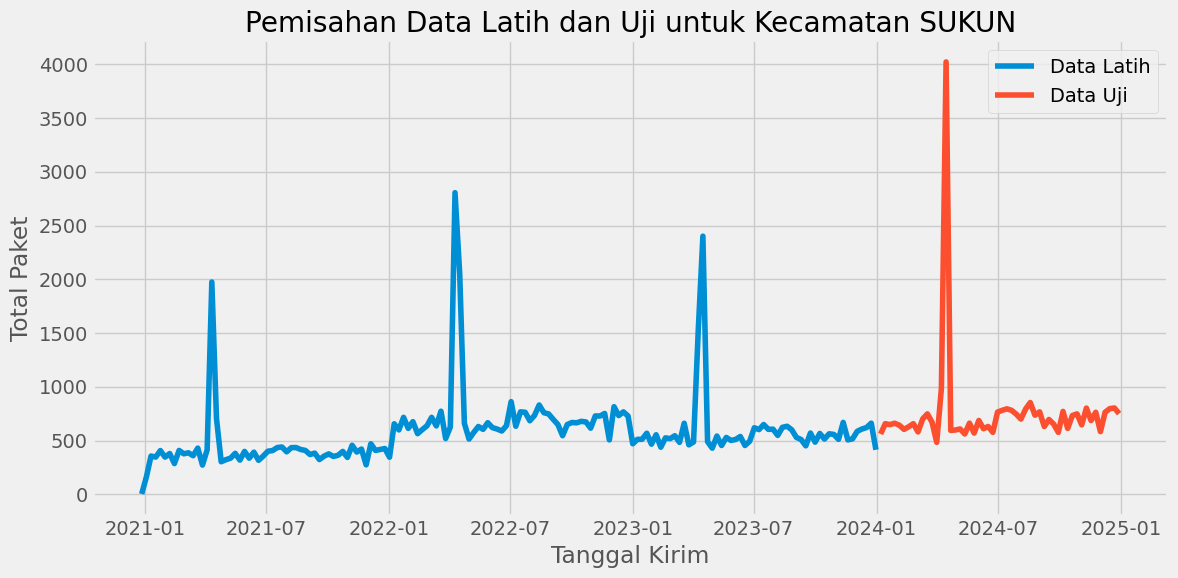

In [ ]:
unique_kecamatan = df_kecamatan_weekly['Kecamatan'].unique()

for kecamatan in unique_kecamatan:
    # Filter data untuk kecamatan saat ini
    df_filtered_kecamatan = df_kecamatan_weekly[df_kecamatan_weekly['Kecamatan'] == kecamatan]

    # Hitung titik pemisahan untuk kecamatan saat ini (52 minggu terakhir untuk data test)
    split_point_kecamatan = len(df_filtered_kecamatan) - 52

    # Pisahkan data menjadi train dan test untuk kecamatan saat ini
    train_kecamatan = df_filtered_kecamatan.iloc[:split_point_kecamatan]
    test_kecamatan = df_filtered_kecamatan.iloc[split_point_kecamatan:]

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=train_kecamatan, x='Tgl_Kirim', y='total paket', label='Data Latih')
    sns.lineplot(data=test_kecamatan, x='Tgl_Kirim', y='total paket', label='Data Uji')
    plt.title(f'Pemisahan Data Latih dan Uji untuk Kecamatan {kecamatan}')
    plt.xlabel('Tanggal Kirim')
    plt.ylabel('Total Paket')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()